## Dimensionality reduction and Data Visualization
Data sets used:
1. Data from unknown distribution given as part of assignment
2. MNIST dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
#Load the data
col_names=['col'+str(i) for i in range(1,513)]
data = pd.read_csv('data.csv',header=None, names=col_names)
print(data.shape)
data.head()

(11314, 512)


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col503,col504,col505,col506,col507,col508,col509,col510,col511,col512
0,-0.035297,0.029409,-0.018685,-0.061988,0.000163,0.061352,0.005467,-0.017907,0.004947,-0.007161,...,0.016054,0.037357,0.044876,0.049632,0.028129,0.015778,0.019557,-0.012840,0.023854,0.021964
1,-0.029250,0.031313,-0.022034,0.007655,0.120337,0.052327,0.000076,-0.007013,0.058050,-0.045211,...,0.024697,-0.008049,-0.006996,-0.001403,0.090910,-0.028228,0.121239,0.022623,0.013831,0.031606
2,0.027296,-0.065714,-0.008342,0.015307,0.041896,-0.015714,0.074884,-0.017592,-0.018039,0.026059,...,-0.053678,0.028407,-0.085769,-0.084654,-0.037368,0.034460,0.018465,0.010240,0.017000,0.035924
3,-0.075878,0.070184,-0.009507,0.015385,0.059124,-0.040433,-0.013789,-0.010937,0.030692,0.020614,...,-0.042548,-0.001875,-0.049372,-0.024912,-0.066280,0.015930,-0.065363,0.006757,0.036287,-0.068546
4,-0.068904,0.052307,-0.023530,-0.036391,-0.041928,0.052879,0.012588,-0.042795,0.021074,0.057250,...,-0.024690,-0.013324,-0.069408,-0.003498,0.061236,-0.030766,-0.053398,0.003611,-0.065949,0.003999


In [4]:
#Performing t-SNE on all 512 dimensions
data_values=data[col_names].values
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(data_values)

data['tSNE_all_dim-one']=tSNE_result[:,0]
data['tSNE_all_dim-two']=tSNE_result[:,1]

In [5]:
#Reducing data to 3 dimensions using pca
pca=PCA(n_components=3)
pca_result=pca.fit_transform(data_values)
print('Explained varaince of 3 principal component analysis is {}'.format(np.sum(pca.explained_variance_ratio_)))

data['pca-one']=pca_result[:,0]
data['pca-two']=pca_result[:,1]
data['pca-three']=pca_result[:,2]

Explained varaince of 3 principal component analysis is 0.09932361071985976


Since the three pca components amount to only 10% variance in the dataset they are not good to observe clusters in the data, we can see this by plotting the pca values and t-SNE values

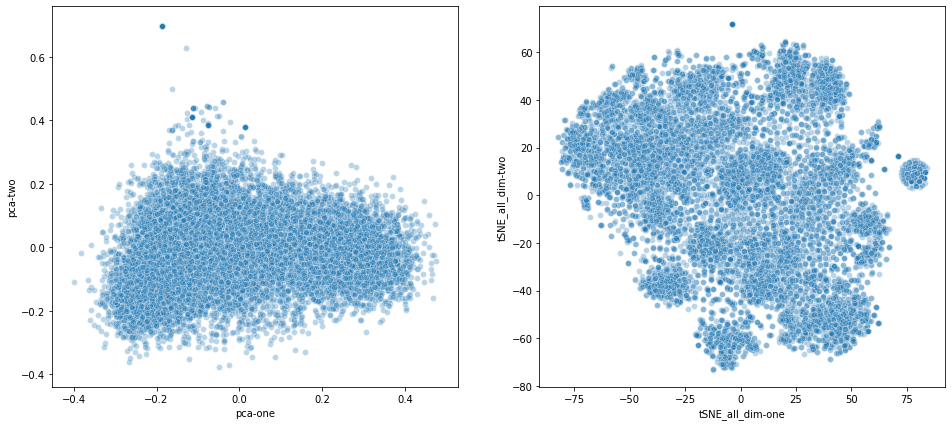

In [6]:
plt.figure(figsize=(16,7))
ax1=plt.subplot(1,2,1)
sns.scatterplot(x='pca-one',y='pca-two',data=data,legend='full',alpha=0.3,ax=ax1)

ax2=plt.subplot(1,2,2)
sns.scatterplot(x='tSNE_all_dim-one',y='tSNE_all_dim-two',data=data,legend='full',alpha=0.3,ax=ax2)


We can already see some clusters in the tSNE plot.
I had read that it is better to reduce data to lower dimensions using PCA (50-100) and then apply t-SNE.
However I observed that PCA 100 dimensions expalins 70 % of the variance, where 200 dimensions explained about 92% of the variance. So we will plot these side by side to see what is the difference between these plots

In [7]:
pca_100=PCA(n_components=100)
pca_100_result=pca_100.fit_transform(data_values)
print('Explained variance of 100 principal component analysis is {}'.format(np.sum(pca_100.explained_variance_ratio_)))

tSNE_100=TSNE(n_components=2)
tSNE_100_result=tSNE_100.fit_transform(pca_100_result)

data['tSNE_100-one']=tSNE_100_result[:,0]
data['tSNE_100-two']=tSNE_100_result[:,1]

pca_200=PCA(n_components=200)
pca_200_result=pca_200.fit_transform(data_values)
print('Explained variance of 200 principal component analysis is {}'.format(np.sum(pca_200.explained_variance_ratio_)))

tSNE_200=TSNE(n_components=2)
tSNE_200_result=tSNE_200.fit_transform(pca_200_result)

data['tSNE_200-one']=tSNE_200_result[:,0]
data['tSNE_200-two']=tSNE_200_result[:,1]

Explained variance of 100 principal component analysis is 0.7019341623095985
Explained variance of 200 principal component analysis is 0.9205030411650944


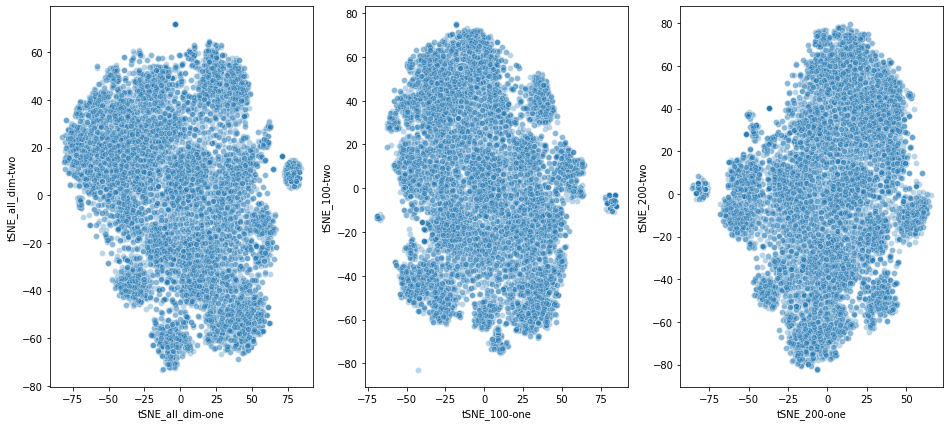

In [8]:
plt.figure(figsize=(16,7))
ax1=plt.subplot(1,3,1)
sns.scatterplot(x='tSNE_all_dim-one',y='tSNE_all_dim-two',data=data,legend='full',alpha=0.3,ax=ax1)

ax2=plt.subplot(1,3,2)
sns.scatterplot(x='tSNE_100-one',y='tSNE_100-two',data=data,legend='full',alpha=0.3,ax=ax2)

ax3=plt.subplot(1,3,3)
sns.scatterplot(x='tSNE_200-one',y='tSNE_200-two',data=data,legend='full',alpha=0.3,ax=ax3)

tSNE reduced data can be a good starting point to apply kmeans algorithm for clustering. For comparison we will apply kmeans on original data of 512 dimensions and then on tSNE reduced dimensions and plot them side by side

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans=KMeans(n_clusters=20).fit(data_values)
kmeans_tsne_all_dim=KMeans(n_clusters=20).fit(tSNE_result)

data['y-kmeans']=kmeans.labels_
data['y-kmeans_tsne_all_dim']=kmeans_tsne_all_dim.labels_

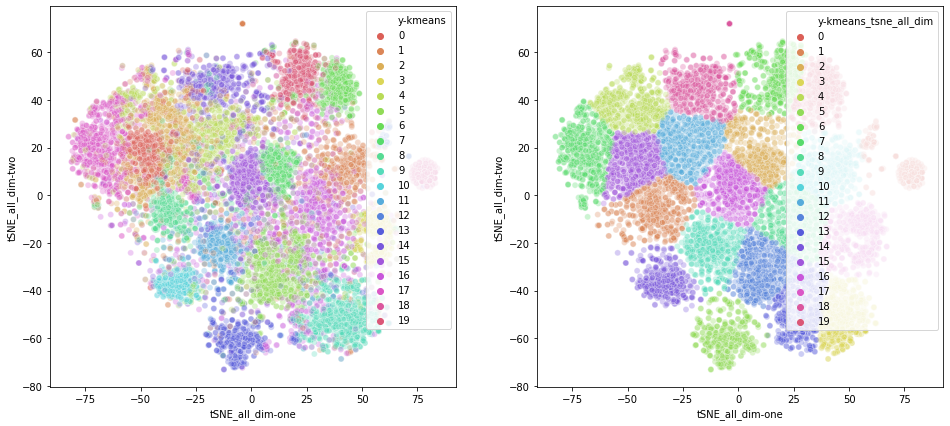

In [12]:
plt.figure(figsize=(16,7))
ax1=plt.subplot(1,2,1)
sns.scatterplot(x='tSNE_all_dim-one',y='tSNE_all_dim-two',hue='y-kmeans',palette=sns.color_palette("hls",20),
                data=data,legend='full',alpha=0.3,ax=ax1)

ax2=plt.subplot(1,2,2)
sns.scatterplot(x='tSNE_all_dim-one',y='tSNE_all_dim-two',hue='y-kmeans_tsne_all_dim',palette=sns.color_palette("hls",20),
                data=data,legend='full',alpha=0.3,ax=ax2)

So as we can see tsne reduced dimensions can be a better starting poing for applying clustering algorithms like k-means. It was observed that k-means on original dimensions gave an accuracy of 54% on average, whereas k-means on tsne reduced dimensions gave an accuracy of 60% on average.

Next we will used the labelled dataset of mnist to visualize the clusters using t-SNE.

In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")
X = mnist.data / 255.0
y = mnist.target

print(X.shape,y.shape)

(70000, 784) (70000,)


In [14]:
feat_cols = ['pixels'+str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X,columns=feat_cols)
df['y']=y
df['label']=df['y'].apply(lambda i: str(i))
# HOW apply lambda works?
# here you are applying on a particular column y
# to apply on entire row use df.apply
# i refers to one entry in column or one row
# here str i is used, but you can use any custom funcion
#df.apply(lambda x: func(x['col1'],x['col2']),axis=1) or df['col'].apply(lambda x: func(x))
# sereies is one df col, axis 0 is vertical, axis 1 is horizontal

X,y=None,None
print('size of dataframe {}'.format(df.shape))

size of dataframe (70000, 786)


In [15]:
#We will take a random permutation of the numbers between 0-70000 and then use only 10000 of the samples further
np.random.seed(42)
rndperm=np.random.permutation(df.shape[0])

N=10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

pca=PCA(n_components=3)
pca_result=pca.fit_transform(data_subset)

df_subset['pca_one']=pca_result[:,0]
df_subset['pca_two']=pca_result[:,1]
df_subset['pca_three']=pca_result[:,2]

print('Explained variation per principal component {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component [0.09819946 0.07123677 0.06113222]


In [16]:
#tsne on all dimensions
tsne=TSNE(n_components=2)
tsne_results=tsne.fit_transform(data_subset)

In [17]:
df_subset['tSNE_all_dim-one']=tsne_results[:,0]
df_subset['tSNE_all_dim-two']=tsne_results[:,1]

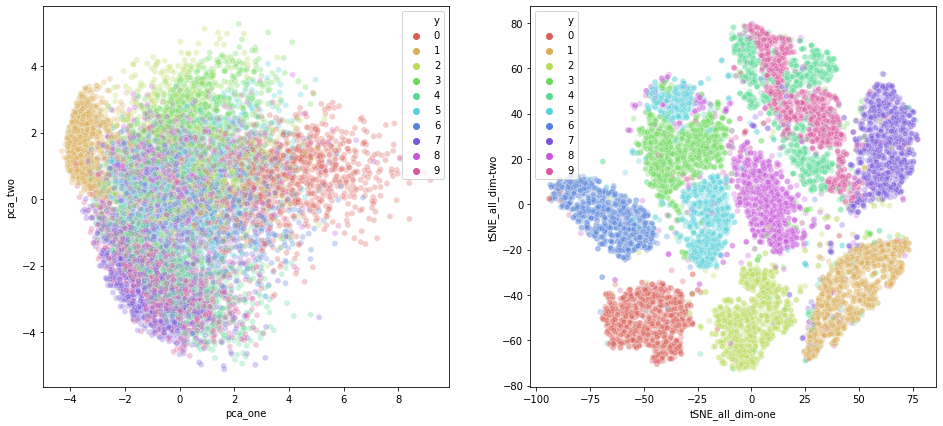

In [18]:
plt.figure(figsize=(16,7))
ax1=plt.subplot(1,2,1)
sns.scatterplot(x='pca_one',y='pca_two',hue='y',palette=sns.color_palette("hls",10),data=df_subset,
               legend="full",alpha=0.3,ax=ax1)

ax2=plt.subplot(1,2,2)
sns.scatterplot(x='tSNE_all_dim-one',y='tSNE_all_dim-two',hue='y',palette=sns.color_palette("hls",10),data=df_subset,
               legend="full",alpha=0.3,ax=ax2)

In [19]:
#trying t-SNE on lesser PCA dimensions
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)

print('Cumulative explained variance ratio for 50 principal components is {}'.format(np.sum(pca_50.explained_variance_ratio_)))

tsne_50=TSNE(n_components=2)
tsne_result_50=tsne_50.fit_transform(pca_result_50)

df_subset['tSNE_50-one']=tsne_result_50[:,0]
df_subset['tSNE_50-two']=tsne_result_50[:,1]

Cumulative explained variance ratio for 50 principal components is 0.8261734708986781


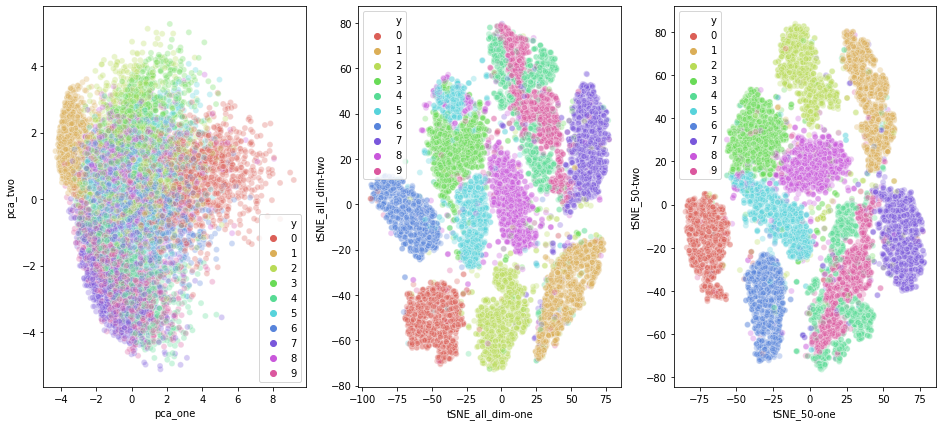

In [20]:
plt.figure(figsize=(16,7))
ax1=plt.subplot(1,3,1)
sns.scatterplot(x='pca_one',y='pca_two',hue='y',palette=sns.color_palette("hls",10),data=df_subset,
               legend="full",alpha=0.3,ax=ax1)

ax2=plt.subplot(1,3,2)
sns.scatterplot(x='tSNE_all_dim-one',y='tSNE_all_dim-two',hue='y',palette=sns.color_palette("hls",10),data=df_subset,
               legend="full",alpha=0.3,ax=ax2)

ax2=plt.subplot(1,3,3)
sns.scatterplot(x='tSNE_50-one',y='tSNE_50-two',hue='y',palette=sns.color_palette("hls",10),data=df_subset,
               legend="full",alpha=0.3,ax=ax2)